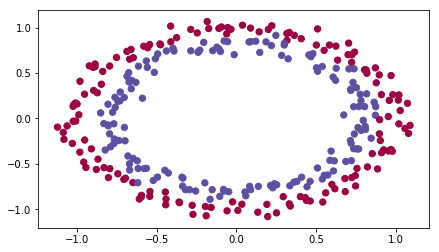

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation, update_parameters
from init_utils import predict, load_dataset, plot_decision_boundary, predict_dec 

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

In [7]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims) #"zeros" in the input argument
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)#"random" in the input argument. 
                                                            #This initializes the weights to large random values.
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)#This initializes the weights to random values scaled 
                                                         #according to a paper by He et al., 2015.

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [8]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        parameters["W" + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters["b" + str(l)] = np.zeros((layers_dims[l],1))
    return parameters

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


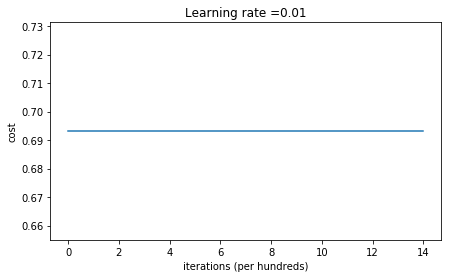

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [9]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

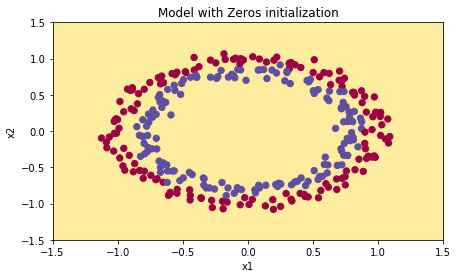

In [10]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

The model is predicting 0 for every example.

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression.


In [11]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)               
    parameters = {}
    L = len(layers_dims)           
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

C:\Users\VIBIN\Desktop\practice\computer-vision\Tuning Hyperparameters\init_utils.py:141: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\VIBIN\Desktop\practice\computer-vision\Tuning Hyperparameters\init_utils.py:141: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6235719528716395
Cost after iteration 2000: 0.5980821226022246
Cost after iteration 3000: 0.5637996692567824
Cost after iteration 4000: 0.5501754102867465
Cost after iteration 5000: 0.5444767640123352
Cost after iteration 6000: 0.5374657035647926
Cost after iteration 7000: 0.4775406670630984
Cost after iteration 8000: 0.39784053325714386
Cost after iteration 9000: 0.3934817369887478
Cost after iteration 10000: 0.39203280921110983
Cost after iteration 11000: 0.38927347547167324
Cost after iteration 12000: 0.3861625886188003
Cost after iteration 13000: 0.38499044850062425
Cost after iteration 14000: 0.38279756848782404


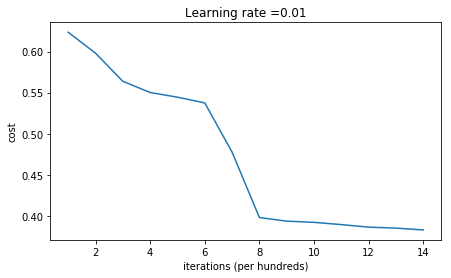

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [12]:
parameters = model(train_X, train_Y, initialization = "random")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

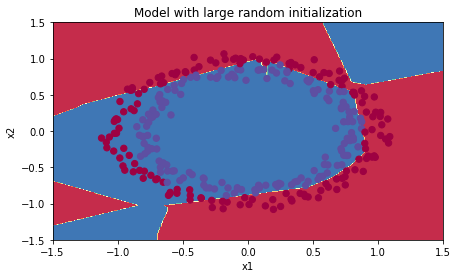

In [13]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Observations:

The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm.
Initializing weights to very large random values does not work well.

In [14]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 
     
    for l in range(1, L + 1):
       
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
       
        
    return parameters

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071795
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322565
Cost after iteration 9000: 0.18597287209206842
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273552
Cost after iteration 12000: 0.09917746546525931
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677365


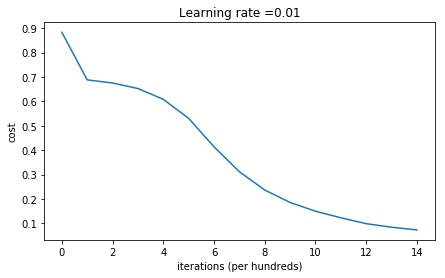

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [15]:
parameters = model(train_X, train_Y, initialization = "he")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

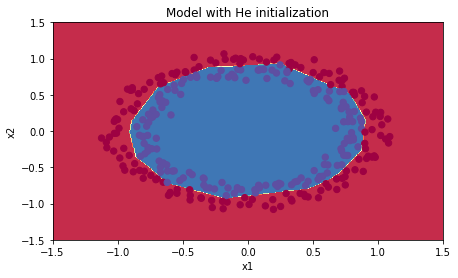

In [16]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)